In [29]:
from dipy.tracking.utils import length
# Compute lookup table
from dipy.denoise.enhancement_kernel import EnhancementKernel
# Apply FBC measures
from dipy.tracking.fbcmeasures import FBCMeasures

import os, sys, re
import argparse
import math
from decimal import Decimal
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import pandas as pd
from tqdm import tqdm

import glob as glob
import nibabel as nib
from scipy.stats import t as t_dist
from tractseg.libs import plot_utils
from sklearn.linear_model import LinearRegression
from dipy.tracking.streamline import Streamlines
import dipy.stats.analysis as dsa

In [17]:
D33 = 1.0
D44 = 0.02
t = 1
k = EnhancementKernel(D33, D44, t)
print("LUT computed")

LUT computed


In [18]:
TRACTO_TCK_IN="/NAS/dumbo/protocoles/CogPhenoPark/DTIanx/Test_DTI/100269SD100714/Nacc_Insula_L_iFOD_corr2_life.tck"

In [19]:
sl_file = nib.streamlines.load(TRACTO_TCK_IN)
streamlines = sl_file.streamlines

In [54]:
len(streamlines)

2911

In [20]:
val=list(length(streamlines))
print(np.mean(val),np.std(val))
print(len(val))
plt.hist(val, bins=100, histtype='step')
plt.show()

38.587654 24.390692
2911


In [27]:
long_streamlines = Streamlines()
thres = np.mean(val)+2*np.std(val) 
for i, sl in enumerate(streamlines):
    if val[i] < thres:
        long_streamlines.append(sl)

30.34076 13.915154
2468


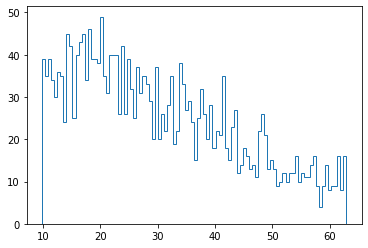

In [28]:
val=list(length(long_streamlines))
print(np.mean(val),np.std(val))
print(len(val))
plt.hist(val, bins=100, histtype='step')
plt.show()

In [30]:
weights = dsa.gaussian_weights(long_streamlines)

0.00040518638573743915 0.00028014873717886995


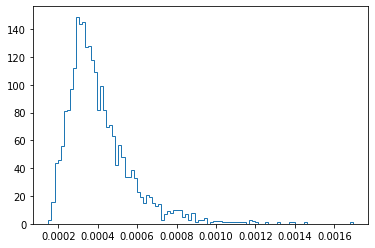

In [43]:
print(np.mean(weights),np.std(weights))
plt.hist(np.mean(weights,axis=1), bins=100, histtype='step')
plt.show()

In [50]:
mal_streamlines = Streamlines()
thres = np.mean(weights)+2*np.std(weights) 
for i, sl in enumerate(long_streamlines):
    if np.mean(weights,axis=1)[i] < thres:
        mal_streamlines.append(sl)

0.0004096681687832855 0.00023661886231366794


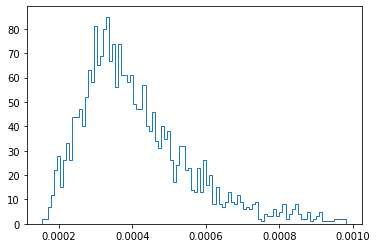

In [51]:
weights = dsa.gaussian_weights(mal_streamlines)
print(np.mean(weights),np.std(weights))
plt.hist(np.mean(weights,axis=1), bins=100, histtype='step')
plt.show()

In [53]:
print(len(mal_streamlines))


2441
